# Questão 1

In [93]:
import pandas as pd
import numpy as np
folder_name = 'C:\\Users\\rodney\\Python'
df1 = pd.read_csv('base.txt', sep='\t')


No gráfico abaixo é mostrada a composição de títulos da carteira por fundo ao qual o título está atrelado

O Fundo 1 tem o maior número de títulos atrelados a ele: 6005 títulos. Em segundo lugar está o Fundo 2, com 2628 títulos.
Os Fundos 4,3 e 5 têm um número pequeno de títulos atrelados.

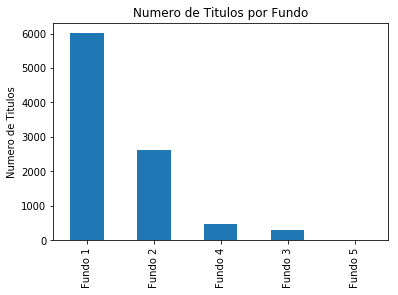

In [94]:
import matplotlib.pyplot as plt
% matplotlib inline
df1['NOME_FUNDO'].value_counts()
df1['NOME_FUNDO'].value_counts().plot('bar')
plt.title("Numero de Titulos por Fundo")
plt.ylabel("Numero de Titulos");

Aqui é mostrada a composição de produtos da carteira.
O Produto 1 tem o maior número de títulos atrelados a ele: 7867 títulos. Em segundo lugar está o Produto 5, com 1109 títulos. Os Fundos 3,2 e 4 têm um número pequeno de títulos atrelados.

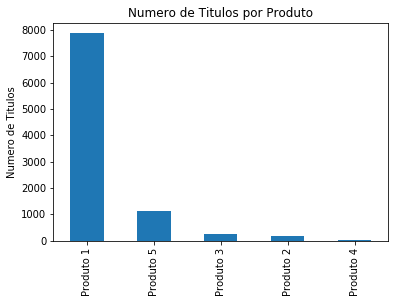

In [95]:
df1['TIPO_PRODUTO'].value_counts()
df1['TIPO_PRODUTO'].value_counts().plot('bar')
plt.title("Numero de Titulos por Produto")
plt.ylabel("Numero de Titulos");

O gráfico abaixo mostra os Cedentes com o respectivo número de títulos aos quais estão atrelados dentro da carteira. Os Cedentes 2,1,17,9 possuem o maior número de títulos: de 2000 até 1000 títulos aproximadamente.

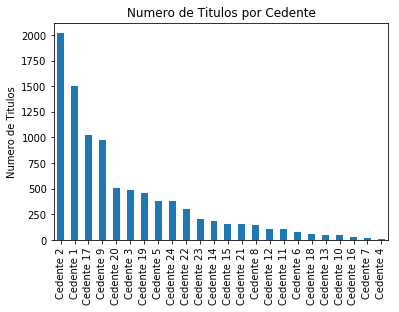

In [96]:
df1['CEDENTE'].value_counts()
df1['CEDENTE'].value_counts().plot('bar')
plt.title("Numero de Titulos por Cedente")
plt.ylabel("Numero de Titulos");

Esta tabela mostra os Sacados com o respectivo número de títulos aos quais estão atrelados dentro da carteira

Os Sacados 181,8,1 possuem o maior número de títulos, de 194 até 51.

In [97]:
df1['SACADO'].value_counts().head(10)

Sacado 181     194
Sacado 8        93
Sacado 1        51
Sacado 12       35
Sacado 2        25
Sacado 90       19
Sacado 620      18
Sacado 670      17
Sacado 396      16
Sacado 1709     15
Name: SACADO, dtype: int64

Esta tabela mostra as estatísticas para o limite dos cedentes na carteira.

A média de limite de cedente é 5,7 milhões,  com desvio padrão de  3,2 milhões. Até 75 por cento dos cedentes da carteira têm até R$ 8 milhões de limite e metade tem até 6,9 milhões.


In [98]:
df1['LIMITE_CEDENTE'].describe()

count    9.415000e+03
mean     5.753972e+06
std      3.259539e+06
min      0.000000e+00
25%      2.500000e+06
50%      6.964286e+06
75%      8.035714e+06
max      1.000000e+07
Name: LIMITE_CEDENTE, dtype: float64

A tabela abaixo mostra a distribuição dos títulos da carteira por estado do cedente.

Ceará,São Paulo e Rio Grande do Sul são os estados com maior número de cedentes na carteira, com 3307,2904 e 1125 títulos respectivamente. Já Mato Grosso e Sergipe são os estados com menor número: 22 e 8.

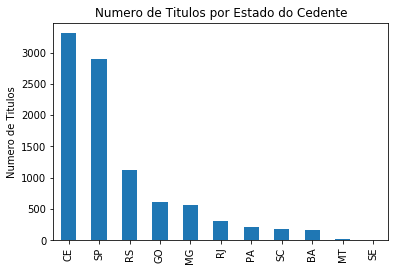

In [99]:
df1['ESTADO_CEDENTE'].value_counts()
df1['ESTADO_CEDENTE'].value_counts().plot('bar')
plt.title("Numero de Titulos por Estado do Cedente")
plt.ylabel("Numero de Titulos");

Esta tabela mostra a distribuição dos títulos da carteira por estado do sacado.

São Paulo,Minas Gerais,Rio Grande do Sul e Paraná são os estados com maior número de sacados na carteira, de 3 mil até 600 títulos. Amapá,Acre e Roraima são os estados com menor número.

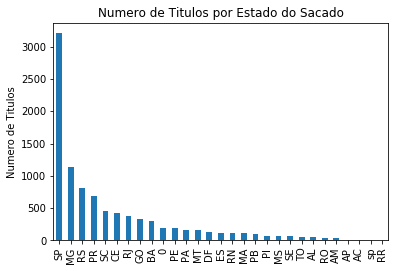

In [100]:
df1['ESTADO_SACADO'].value_counts()
df1['ESTADO_SACADO'].value_counts().plot('bar')
plt.title("Numero de Titulos por Estado do Sacado")
plt.ylabel("Numero de Titulos");

In [101]:
from datetime import datetime
for i in range(0,len(df1)):
    df1.loc[i,'DURACAO'] = (datetime.strptime(df1['VENCIMENTO'][i],'%Y-%m-%d')-datetime.strptime(df1['DATA_EMISSAO'][i],'%Y-%m-%d'))
    

In [102]:
df1['DURACAO1'] = df1['DURACAO'][:].astype('timedelta64[D]')


Esta tabela mostra a distribuição dos títulos da carteira por duração do título.

A duração média dos títulos da carteira é de 83 dias. 75% dos títulos têm duração até 89 dias.

In [103]:
df1['DURACAO1'].describe()

count    9415.000000
mean       82.954753
std        97.835244
min        -1.000000
25%        30.000000
50%        51.000000
75%        89.000000
max      1118.000000
Name: DURACAO1, dtype: float64

Esta tabela mostra a distribuição dos títulos da carteira por valor do título.

O valor médio dos títulos da carteira é de 6 mil, com desvio padrão de 4 mil.
75 por cento dos títulos têm valor de até 2,8 mil.

In [104]:
df1['VALOR_REAL'].describe()

count    9.415000e+03
mean     6.434006e+03
std      4.192773e+04
min      1.724000e+01
25%      4.809900e+02
50%      9.782300e+02
75%      2.868530e+03
max      3.112000e+06
Name: VALOR_REAL, dtype: float64

Aqui são mostrados os títulos em dia e em atraso na carteira. A maior parte, 7548, foi pago em dia. Já 1867 foram pagos em atraso.

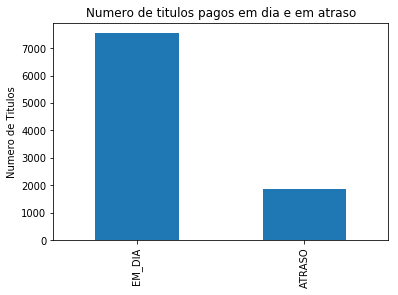

In [105]:
df1['STATUS_LIQ_TITULO'].value_counts()
df1['STATUS_LIQ_TITULO'].value_counts().plot('bar')
plt.title("Numero de titulos pagos em dia e em atraso")
plt.ylabel("Numero de Titulos");

A taxa mensal média é de 4,6%. A taxa de até 5,4¨% representa 75 por cento dos títulos da carteira. Metade dos títulos têm até 3,4% de taxa mensal.

In [106]:
df1['TAXA_MENSAL'].describe()

count    9413.000000
mean        0.046295
std         0.050580
min        -0.532319
25%         0.023639
50%         0.034636
75%         0.054734
max         2.320652
Name: TAXA_MENSAL, dtype: float64

75 por cento dos títulos em dia são de até 3 mil. A média de valor real dos título em dia é de 6,7 mil.

In [107]:
df1.query('STATUS_LIQ_TITULO =="EM_DIA"')['VALOR_REAL'].describe()

count    7.548000e+03
mean     6.761373e+03
std      4.513259e+04
min      1.724000e+01
25%      4.968600e+02
50%      1.081570e+03
75%      3.239218e+03
max      3.112000e+06
Name: VALOR_REAL, dtype: float64

Aqui é mostrado o percentual de títulos em dia de acordo com o estado do sacado. Sergipe e Rio Grande do Norte possuem 91% dos sacados com títulos em dia. Maranhão,Tocantins,Goiás e Distrito Federal possuem o menor número de títulos em dia, 75% até 67%.

In [108]:
va1 = df1['ESTADO_SACADO'].value_counts()
va2 = df1.query('STATUS_LIQ_TITULO =="ATRASO"')['ESTADO_SACADO'].value_counts()
va3 = df1.query('STATUS_LIQ_TITULO =="EM_DIA"')['ESTADO_SACADO'].value_counts()
df5 = va1.rename_axis('estado').reset_index(name='total_sacado')
df6 = va2.rename_axis('estado').reset_index(name='atraso')
df7 = va3.rename_axis('estado').reset_index(name='em_dia')
df8 = pd.merge(df5, df6, on='estado', how='inner')
df9 = pd.merge(df8, df7, on='estado', how='inner')
df9['perc_em_dia'] =100*df9['em_dia']/df9['total_sacado']
df9 = df9.round({'perc_em_dia': 2})
df9.sort_values("perc_em_dia",ascending= False)

,estado,total_sacado,atraso,em_dia,perc_em_dia
20,SE,61,5,56,91.80
15,RN,115,10,105,91.30
22,AL,48,5,43,89.58
19,MS,66,7,59,89.39
4,SC,454,49,405,89.21
11,PA,165,19,146,88.48
25,AP,8,1,7,87.50
17,PB,102,13,89,87.25
18,PI,68,9,59,86.76
23,RO,35,5,30,85.71


Os 25% maiores clientes, ou seja,com maior valor real estão concentrados em São Paulo,Ceará,Rio Grande do Sul e Minas Gerais. Bahia,Santa Catarina,Mato Grosso,Goiás e Sergipe são os estados com clientes de menor valor real.

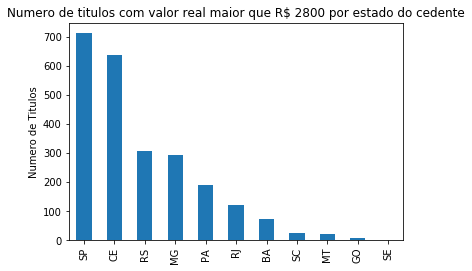

In [109]:
df1.query('VALOR_REAL >2800')['ESTADO_CEDENTE'].value_counts().plot('bar')
plt.title("Numero de titulos com valor real maior que R$ 2800 por estado do cedente")
plt.ylabel("Numero de Titulos");


# Questão 2

A metodologia utilizada será a divisão em clusters, segmentando assim cada cliente, definido por cada um dos clusters. Este é um caso clássico de aprendizado não supervisionado, onde temos os dados e desejamos um rótulo para eles. O algoritmo escolhido é o KMeans, já que neste caso é possível ter o número de segmentos de cliente que desejamos.Será feita uma redução de dimensionalidade antes de aplicar o KMeans, para entender quais variáveis produzem maior variância nos dados.

In [110]:
# Pré processamento das variáveis

ESTADO_CEDENTE2 = pd.get_dummies(df1['ESTADO_CEDENTE'])
df1 = df1.join(ESTADO_CEDENTE2)
ST_LIQ = pd.get_dummies(df1['STATUS_LIQ_TITULO'])
df1 = df1.join(ST_LIQ)
df1['LIMITE_CEDENTE'] = np.log(df1['LIMITE_CEDENTE']+1)
df1['VALOR_REAL'] = np.log(df1['VALOR_REAL'])
df1['VALOR_DESAGIO'] = np.log(df1['VALOR_DESAGIO'])
df1['DURACAO1'] = np.log(df1['DURACAO1']+1.01)
df1['TAXA_MENSAL'] = df1.TAXA_MENSAL.apply(lambda x: x if not pd.isnull(x) else df1['TAXA_MENSAL'].mean())
#df1['TAXA_MENSAL'] = np.log(df1['TAXA_MENSAL']+1)

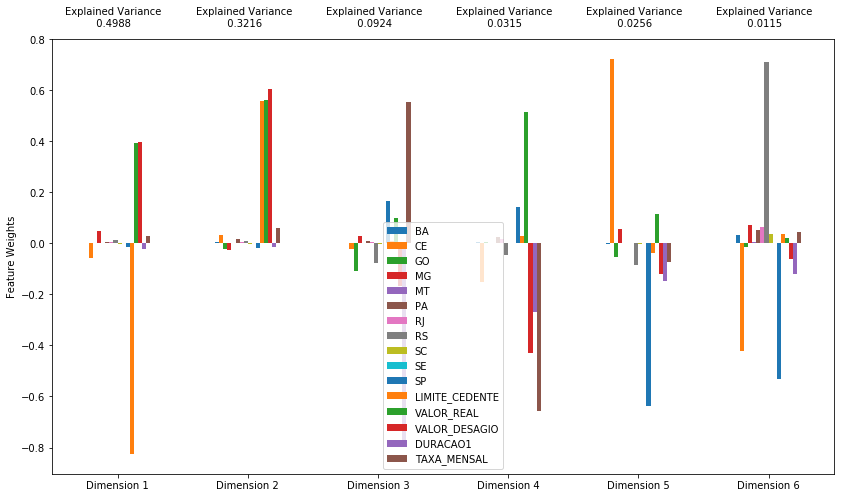

In [116]:
# Gerar o PCA e a visualização

import visuals as vs
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
df2 = df1[['BA','CE','GO', 'MG', 'MT', 'PA', 'RJ', 'RS', 'SC', 'SE', 'SP','LIMITE_CEDENTE','VALOR_REAL','VALOR_DESAGIO','DURACAO1','TAXA_MENSAL']].copy()
pca.fit(df2)
pca_results = vs.pca_results(df2, pca)


As 2 primeiras dimensões explicam 85% da variação nos dados dos títulos.
Estas duas dimensões representam dois perfis de títulos. A primeira dimensão é um perfil cujo limite do cedente
é inversamente proporcional ao valor real do título e valor de deságio.A segunda dimensão é um perfil cujo limite do cedente
é diretamente proporcional ao valor real do título e valor de deságio.

In [81]:
# Realizar PCA com duas componentes
pca = PCA(n_components=2)
pca.fit(df2)
reduced_data = pca.transform(df2)
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1','Dimension 2'])

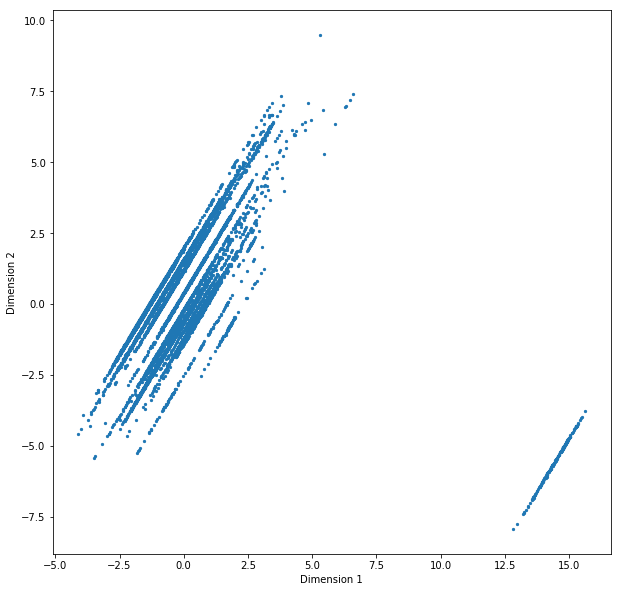

In [ ]:
reduced_data.plot.scatter(x='Dimension 1', y='Dimension 2',marker = '.',figsize=(10,10))

O gráfico acima mostra uma divisão bem clara dos grupos de títulos em função das duas categorias Dimension1 e Dimension2. Com base nesta segmentação pode-se definir o limite do cedente. Cedentes com valor alto de dimensão1 devem ter um limite menor, pois são menos rentáveis para a Financeira, já os cedentes com valor alto da dimensão2 devem ter um limite maior,sendo os mais rentáveis.Será utilizada uma análise de cluster, com número de clusters igual a 2 para segmentar os dois grupos de títulos.

In [ ]:
from sklearn.cluster import KMeans
clusterer = KMeans(n_clusters=2)
clusterer.fit(reduced_data)

# Prever o cluster para cada ponto de dado
preds = clusterer.predict(reduced_data)

# Achar os centros do cluster
centers =  clusterer.cluster_centers_

# Calcular a média do coeficiente de silhueta para o número de clusters escolhidos
from sklearn import metrics
score = metrics.silhouette_score(reduced_data,preds)
print score

O resultado alto para o score indica que a segmentação foi feita de forma bastante satisfatória

In [ ]:
# Mostrar os resultados do clustering da implementação
vs.cluster_results(reduced_data, preds, centers)

Este é o resultado final da segmentação.Desta forma pode-se prever em qual categoria cada título pertence e definir seu limite de cedente

# Questão 3

Para separar os títulos que foram pagos em dia dos que não foram é possível utilizar um algoritmo de aprendizado de máquina supervisionado, pois temos os rótulos e desejamos prever com base nas variáveis a situação de cada título.O algoritmo escolhido é o RandomForest, que constrói várias árvores de decisão e obtêm a média destas árvores.O RandomForest não tem o problema de overfitting que afeta algoritmos de árvore. O rótulo é a variável 'EM_DIA',se for '1' o título foi pago pago em dia,se for '0'
este título não foi pago em dia.

In [ ]:
# Foi verificado nas váriaveis Risco vários valores NaN
df1_n = df1.fillna(df1.mean())

In [ ]:
# Carregar o algoritmo e definir variáveis e rótulos
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(class_weight="balanced",random_state=42)
features = df1_n[['BA','CE','GO', 'MG', 'MT', 'PA', 'RJ', 'RS', 'SC', 'SE', 'SP','LIMITE_CEDENTE',
'VALOR_REAL','VALOR_DESAGIO','DURACAO1','TAXA_MENSAL','RISCO_1','RISCO_2','RISCO_3','RISCO_4',
'RISCO_5','RISCO_6','RISCO_7','RISCO_8','RISCO_9','RISCO_10','RISCO_11','RISCO_12','RISCO_13',
'RISCO_14','RISCO_15','RISCO_16','RISCO_17','RISCO_18','RISCO_19','RISCO_20','RISCO_21']].copy()
labels = df1['EM_DIA']

# Dividir os dados entre teste e treinamento
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
features_train, features_test, labels_train, labels_test = train_test_split(features, labels,stratify=labels, test_size=0.3, random_state=42)

In [ ]:
# Random Forest tunning
from sklearn.model_selection import GridSearchCV
import time
t0= time.time()
params = {"max_depth": [3,4,5,6],
              "max_features": [3,4,5],
              "min_samples_split": [0.1,0.2, 0.3],
              "criterion": ["gini", "entropy"],
               "n_estimators":[5,10,15]}

estimator = GridSearchCV(clf, param_grid=params)
estimator.fit(features_train, labels_train)
clf = estimator.best_estimator_

pred = clf.predict(features_test) 
print "runtime:",round(time.time()-t0,3),"s"

As métricas escolhidas são Precision e Recall. Precision indica em um número de previsões a quantidade de acertos de títulos em dia ou não. Recall indica no conjunto de dados a quantidade de títulos em dia ou não que são corretamente identificados.Para avaliação do modelo será utilizada a validação cruzada. Este tipo de validação divide o conjunto de treinamento em k partes,com o treinamento do modelo em k-1 partes.O modelo é testado na parte k restante. Este processo é realizado em um loop de k iterações,o valor final da métrica é a média dos valores obtidos para as iterações.

In [ ]:
# Avaliar Precision e Recall
scores =cross_val_score(clf, features,labels, cv=8, scoring='precision')
print "Cross Validation Score-Precision:",round(scores.mean(),2)
scores =cross_val_score(clf, features,labels, cv=8, scoring='recall')
print "Cross Validation Score-Recall:",round(scores.mean(),2)

O algoritmo alcançou ótimos resultados, Precision 0.86 e Recall 0.87. Desta forma é possível prever com base nas variáveis se um novo título será pago em dia ou atraso pelo credor.Este é um importante idicador para que a Financeira possa classificar instituições financeiras para a compra de recebíveis dos cedentes.